In [1]:
%pip install pydot
%pip install networkx 
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pydot in c:\users\farha\appdata\local\packages\pythonsoftwarefoundation.python.3.8_qbz5n2kfra8p0\localcache\local-packages\python38\site-packages (3.0.1)



You should consider upgrading via the 'C:\Users\farha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\farha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\farha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

In [2]:
dataset = pd.read_csv("./dataset/merged_csv/cleaned_merged_heart_dataset.csv")
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Define features and target variable
X = dataset.drop('target', axis=1)  # Replace 'target' with your actual target column name
y = dataset['target']  # Replace 'target' with your actual target column name

#drop all columns with missing values
X = X.dropna(axis=1)

def fit_model(dataset, target, test_size, random_state_value, hidden_layer_sizes, activation,batch_size, learning_rate, learning_rate_init, max_iter):
    X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=test_size, random_state=random_state_value)

    model = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        batch_size=batch_size,
        learning_rate=learning_rate,
        learning_rate_init=learning_rate_init,
        max_iter=max_iter,
        random_state=random_state_value,
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return y_test, y_pred

def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

### Best Activation Function

In [9]:
import tqdm

results = {}
# deduce best activation function
for activation_function in tqdm.tqdm(['identity', 'logistic', 'tanh', 'relu']):
    y_test, y_pred = fit_model(X, y, 0.2, 8, (100, 100), activation_function, 100, 'constant', 0.001, 200)
    accuracy = evaluate_model(y_test, y_pred)
    results[activation_function] = accuracy
    
data = pd.DataFrame.from_dict(results, orient='index', columns=['accuracy'])
data = data.sort_values('accuracy', ascending=False)
data

 25%|██▌       | 1/4 [00:00<00:00,  3.76it/s]c:\Users\sarwi\.conda\envs\WORD2VEC\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
100%|██████████| 4/4 [00:09<00:00,  2.38s/it]


,accuracy
logistic,0.849206
tanh,0.817460
relu,0.772487
identity,0.497354


### Best Batch Size

In [10]:
import tqdm

results = {}

# generate batch sizes
batch_sizes = [10, 20, 40, 60, 80, 100, 200, 400, 600, 800, 1000, "auto"]
for batch_size in tqdm.tqdm(batch_sizes):
    y_test, y_pred = fit_model(X, y, 0.2, 8, (50, 50), 'logistic', batch_size, 'constant', 0.001, 200)
    accuracy = evaluate_model(y_test, y_pred)
    results[batch_size] = accuracy
    
data = pd.DataFrame.from_dict(results, orient='index', columns=['accuracy'])
data = data.sort_values('accuracy', ascending=False)
data

  8%|▊         | 1/12 [00:07<01:24,  7.70s/it]c:\Users\sarwi\.conda\envs\WORD2VEC\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
 17%|█▋        | 2/12 [00:15<01:18,  7.85s/it]c:\Users\sarwi\.conda\envs\WORD2VEC\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
 25%|██▌       | 3/12 [00:22<01:08,  7.61s/it]c:\Users\sarwi\.conda\envs\WORD2VEC\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
 33%|███▎      | 4/12 [00:29<00:56,  7.01s/it]c:\Users\sarwi\.conda\envs\WORD2VEC\Lib\site-packages\sklearn\neural_network\_multilaye

,accuracy
40,0.891534
60,0.880952
80,0.880952
20,0.854497
100,0.849206
10,0.830688
200,0.828042
auto,0.828042
400,0.801587
600,0.791005


### Best Learning Rate

In [11]:
import tqdm

results = {}

for learning_rate in tqdm.tqdm(['constant', 'invscaling', 'adaptive']):
    y_test, y_pred = fit_model(X, y, 0.2, 8, (100, 100), 'logistic', 40, learning_rate, 0.001, 200)
    accuracy = evaluate_model(y_test, y_pred)
    results[learning_rate] = accuracy
    
data = pd.DataFrame.from_dict(results, orient='index', columns=['accuracy'])
data = data.sort_values('accuracy', ascending=False)
data

  0%|          | 0/3 [00:00<?, ?it/s]c:\Users\sarwi\.conda\envs\WORD2VEC\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
 33%|███▎      | 1/3 [00:07<00:14,  7.21s/it]c:\Users\sarwi\.conda\envs\WORD2VEC\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
 67%|██████▋   | 2/3 [00:13<00:06,  6.82s/it]c:\Users\sarwi\.conda\envs\WORD2VEC\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
100%|██████████| 3/3 [00:20<00:00,  6.77s/it]


,accuracy
constant,0.891534
invscaling,0.891534
adaptive,0.891534


### Best Number of Epoch

In [12]:
import tqdm

results = {}

# generate batch sizes
for number_of_epoch in tqdm.tqdm(range(50, 1000, 50)):
    y_test, y_pred = fit_model(X, y, 0.2, 8, (100, 100), 'logistic', batch_size, 'constant', 0.001, number_of_epoch)
    accuracy = evaluate_model(y_test, y_pred)
    results[number_of_epoch] = accuracy
    
data = pd.DataFrame.from_dict(results, orient='index', columns=['accuracy'])
data = data.sort_values('accuracy', ascending=False)
data

  0%|          | 0/19 [00:00<?, ?it/s]c:\Users\sarwi\.conda\envs\WORD2VEC\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
  5%|▌         | 1/19 [00:01<00:18,  1.04s/it]c:\Users\sarwi\.conda\envs\WORD2VEC\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
 11%|█         | 2/19 [00:03<00:28,  1.66s/it]c:\Users\sarwi\.conda\envs\WORD2VEC\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
 16%|█▌        | 3/19 [00:06<00:37,  2.32s/it]c:\Users\sarwi\.conda\envs\WORD2VEC\Lib\site-packages\sklearn\neural_network\_multilayer_percept

,accuracy
500,0.917989
550,0.917989
900,0.917989
850,0.917989
800,0.917989
750,0.917989
700,0.917989
650,0.917989
600,0.917989
950,0.917989


In [15]:
import tqdm

results = {}

for number_of_hidden_layers in tqdm.tqdm(range(1, 10)):
    for number_of_neurons in range(10, 100, 10):
        layer_sizes = tuple([number_of_neurons] * number_of_hidden_layers)
        y_test, y_pred = fit_model(X, y, 0.2, 8, layer_sizes, 'logistic', batch_size, 'constant', 0.001, 1000)
        accuracy = evaluate_model(y_test, y_pred)
        results[str(number_of_hidden_layers) + "x" + str(number_of_neurons)] = accuracy
    
data = pd.DataFrame.from_dict(results, orient='index', columns=['accuracy'])
data = data.sort_values('accuracy', ascending=False)
data

100%|██████████| 9/9 [04:16<00:00, 28.55s/it]


,accuracy
2x50,0.923280
2x90,0.894180
1x70,0.894180
4x40,0.891534
2x30,0.888889
...,...
6x50,0.497354
6x40,0.497354
6x30,0.497354
6x20,0.497354


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Calculate error rate
error_rate = 1 - accuracy

# Extract True Negatives (TN), False Positives (FP), False Negatives (FN), and True Positives (TP) from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate Specificity (True Negative Rate)
specificity = tn / (tn + fp)

# Output the final metrics
print(f"\nModel Accuracy with random_state={random_state_value}: {accuracy * 100:.2f}%")
print(f"Error Rate: {error_rate * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Specificity: {specificity:.2f}")

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Model Accuracy with random_state=229: 81.92%
Error Rate: 18.08%
Precision: 0.82
Recall: 0.82
F1-Score: 0.82
Specificity: 0.81

Confusion Matrix:
[[191  46]
 [ 33 167]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       237
           1       0.78      0.83      0.81       200

    accuracy                           0.82       437
   macro avg       0.82      0.82      0.82       437
weighted avg       0.82      0.82      0.82       437



C:\Users\farha\AppData\Local\Temp\ipykernel_24104\3896776219.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, ax=axs[1], palette=colors)


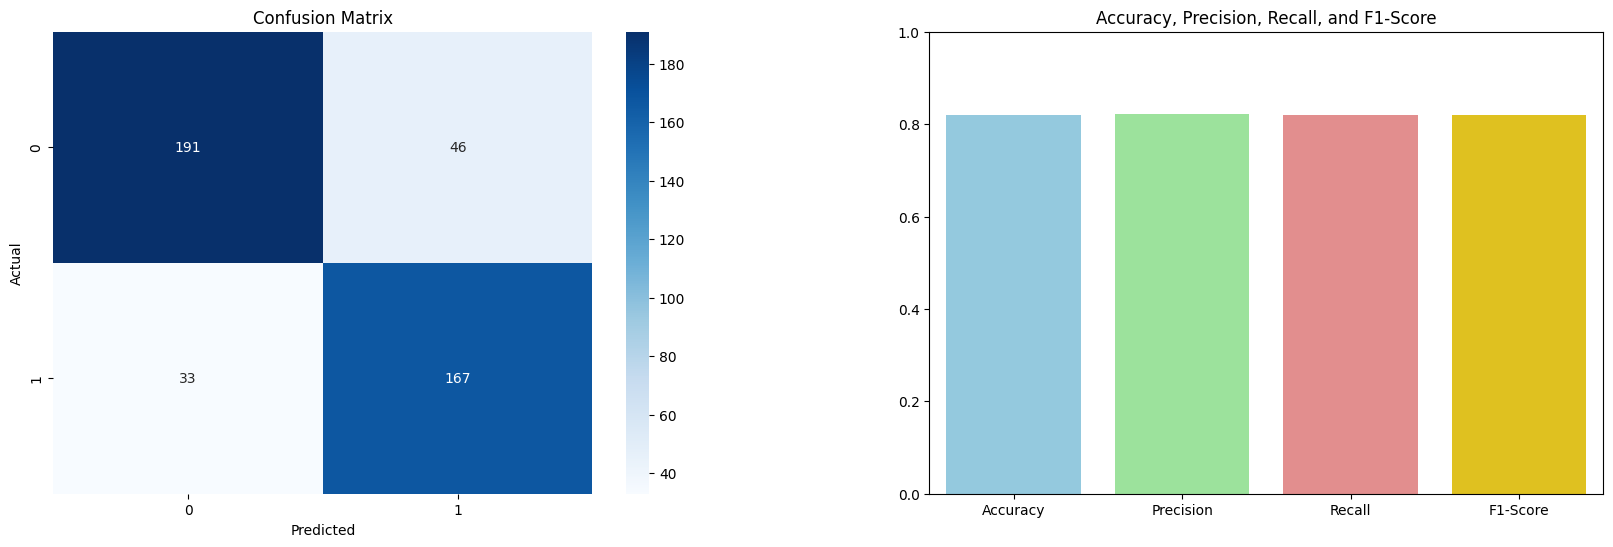

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 8: Visualization with subplots

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))  # Two subplots: confusion matrix and precision/recall/F1-score

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')
axs[0].set_title('Confusion Matrix')

# Plot Accuracy, Precision, Recall, and F1-Score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']  # Different colors for each bar

sns.barplot(x=metrics, y=values, ax=axs[1], palette=colors)
axs[1].set_ylim(0, 1)
axs[1].set_title('Accuracy, Precision, Recall, and F1-Score')

# Adjust the space between the subplots
plt.subplots_adjust(wspace=0.3)

# Display the plots
plt.show()


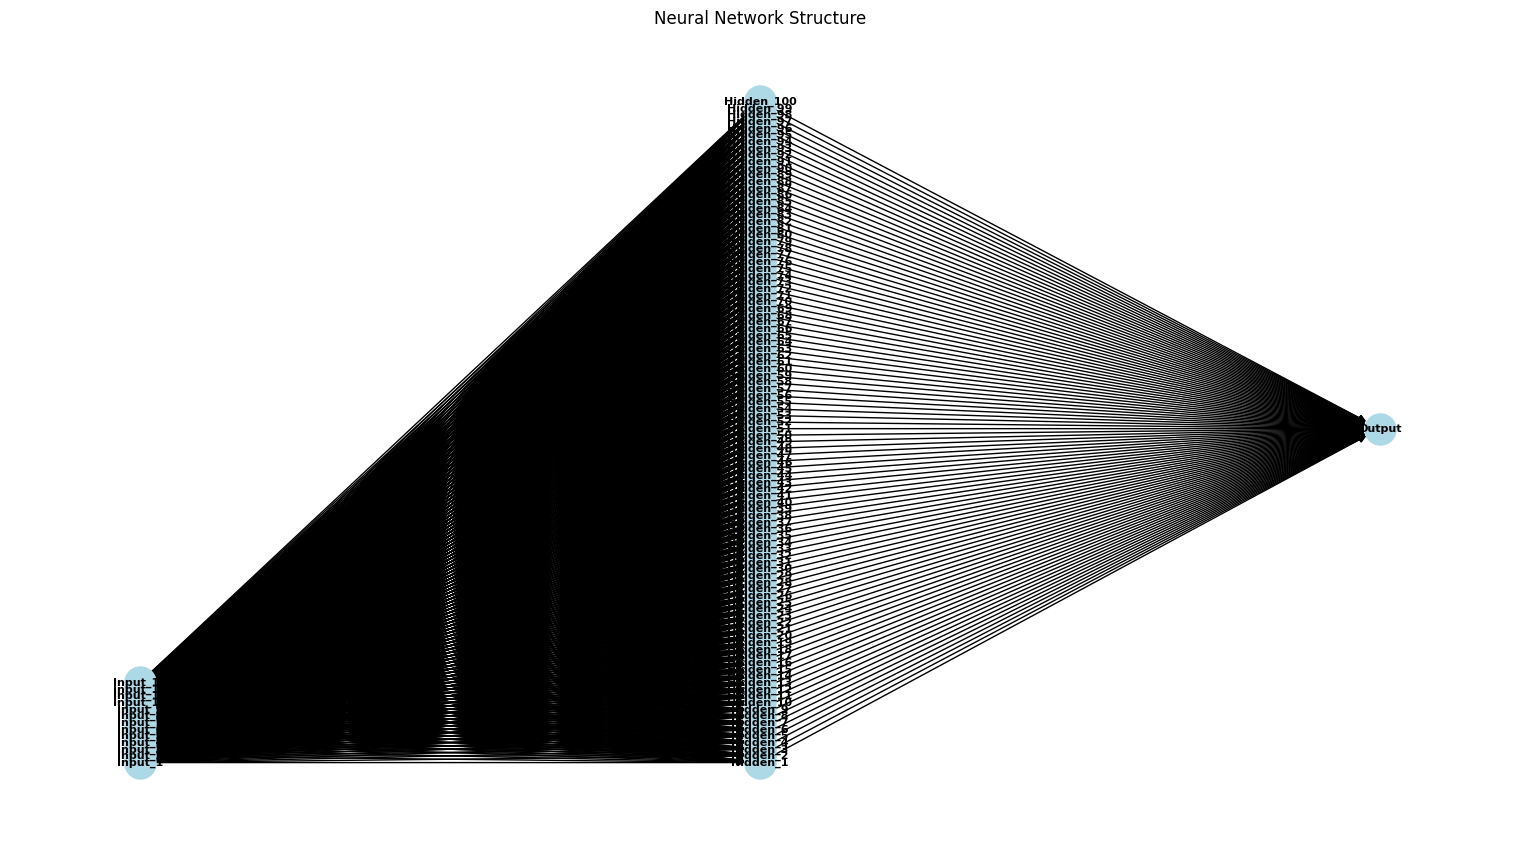

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Define the layers
input_layer = ["Input_" + str(i) for i in range(1, X_train.shape[1] + 1)]
hidden_layer = ["Hidden_" + str(i) for i in range(1, 101)]  # 100 neurons in the hidden layer
output_layer = ["Output"]

# Add nodes for each layer
G.add_nodes_from(input_layer, layer='input')
G.add_nodes_from(hidden_layer, layer='hidden')
G.add_nodes_from(output_layer, layer='output')

# Add edges (connections between layers)
for i in input_layer:
    for j in hidden_layer:
        G.add_edge(i, j)
        
for j in hidden_layer:
    for k in output_layer:
        G.add_edge(j, k)

# Define positions for each layer
pos = {}
pos.update((node, (0, i)) for i, node in enumerate(input_layer))  # Input nodes
pos.update((node, (1, i)) for i, node in enumerate(hidden_layer))  # Hidden nodes
pos.update((node, (2, len(hidden_layer)//2)) for node in output_layer)  # Output node

# Draw the network
plt.figure(figsize=(15, 8))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=8, font_weight='bold', arrows=True)
plt.title("Neural Network Structure")
plt.show()

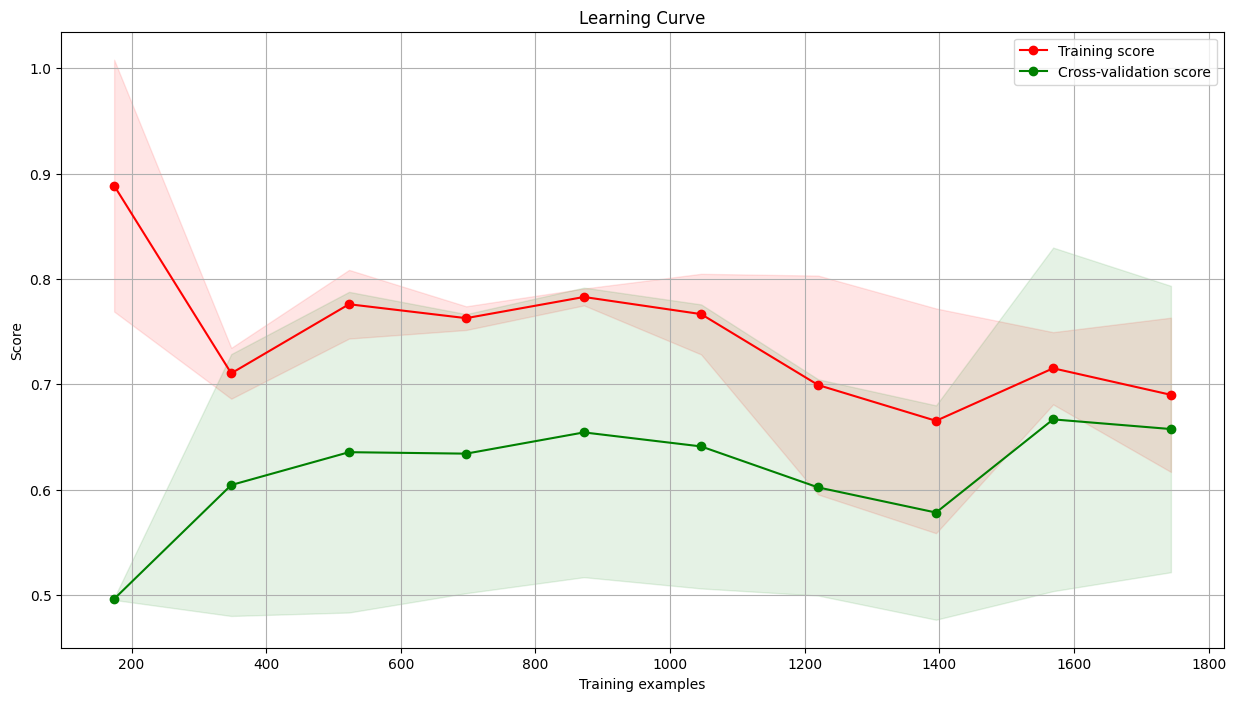

In [ ]:
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    model, X_imputed, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(15, 8))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()


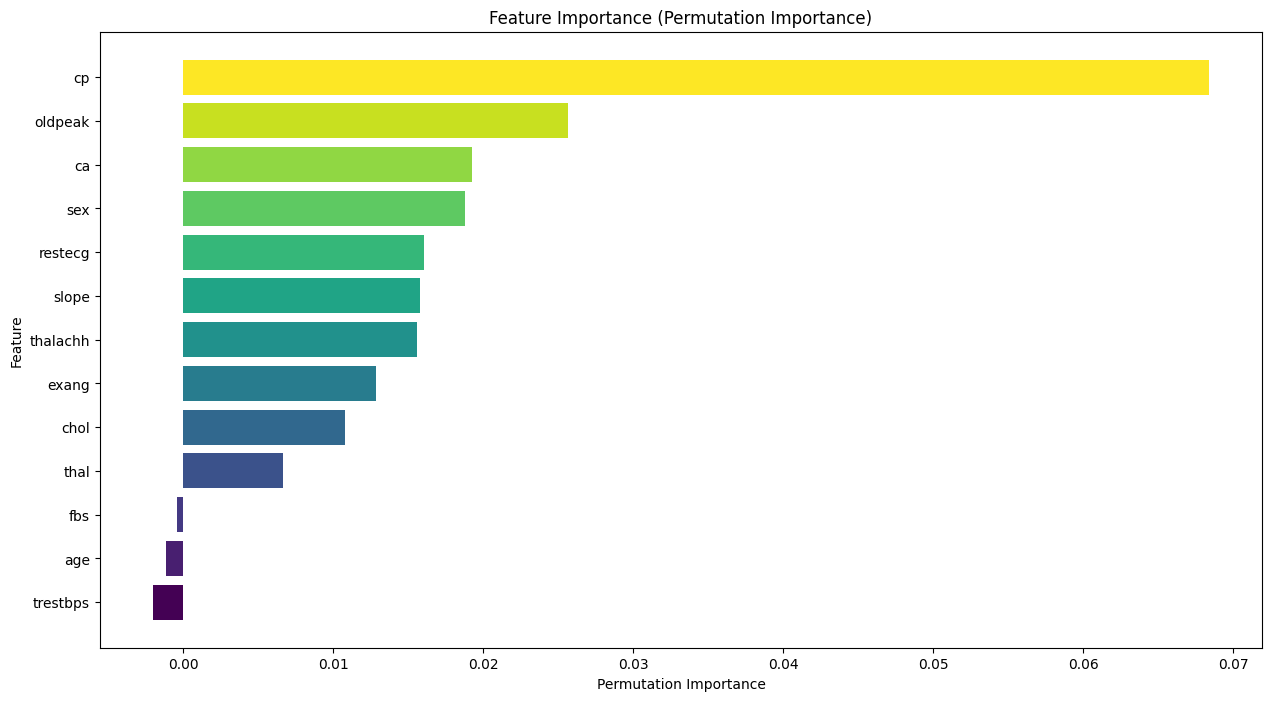

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Calculate permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Sort feature importances by their importance
sorted_idx = perm_importance.importances_mean.argsort()

# Create a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_idx)))

# Plot feature importances with different colors for each bar
plt.figure(figsize=(15, 8))
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx], color=colors)
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Permutation Importance)')
plt.show()
